# Principal Component Analysis(PCA)

PCA is one of the ways to speed up a Machine Learning algorithm so that it fits faster to the training data. There might be a case where the input data or features might be in a higher dimension resulting in slow learning algorithm which takes a long time. To reduce the dimensionality without affecting or loosing any information which can be seen by the variance ratio. One of the aim of PCA is to maximise variance that is, after PCa is applied and if we want to reconstruct the original data back from the principal components, variance or information gained should be maximised or the information lost while doing so minimised.

On our crime dataset, we applied PCA over the Age columns with certain age ranges in order to reduce the feature dimensionality into a 2 dimensional space and plot the features against the label 'violent_crime_occurence' to see the result of applying PCA. The feature set first needs to be standardized and scaled well to give us accurate results. The feature set consists of the following columns from the dataset: 'agePct12t21',''agePct12t29,'agePct16t24'and 'agePct65up'.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

## Data Cleaning

In [89]:
df = pd.read_csv('crimedata.csv',sep= ',', encoding= "ISO-8859-1")
df=df.rename(columns = {'Êcommunityname':'Community Name'})
df = df.replace('?', '0')

In [90]:
df.head()

,Community Name,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,0,0,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,0,0,306.64,0
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,0,9988.79


## Criteria based Label Creation

In [91]:
violent_crimes = list(map(float, df.ViolentCrimesPerPop))

In [92]:
violent_crimes_mean = sum(violent_crimes)/len(violent_crimes)

In [93]:
violent_crimes_mean

530.3040045146731

In [94]:
df['mean_violent_crimes'] = violent_crimes_mean

In [95]:
df['violent_crime_occurence'] = np.where(violent_crimes>=df['mean_violent_crimes'], 'yes', 'no')

In [87]:
df.groupby('violent_crime_occurence').mean()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,mean_violent_crimes
violent_crime_occurence,,,,,,,,,,,,,,,,,,,,,
no,5.509979,32689.042670,2.707529,4.716284,90.651535,2.434721,4.499188,14.372340,27.183125,13.781672,...,52.989732,77.301493,88.433861,20.915279,2383.545630,2.755100,0.433827,2.309704,2.775354,530.304005
yes,5.464567,92072.383202,2.706942,18.142375,71.258031,3.119226,14.530604,14.585984,28.525249,14.344055,...,48.771535,77.620039,87.497874,39.823228,3547.116535,3.586522,2.021929,18.166667,11.739829,530.304005


## Individual feature vs label plots to vizualize data before applying PCA

<function matplotlib.pyplot.show(*args, **kw)>

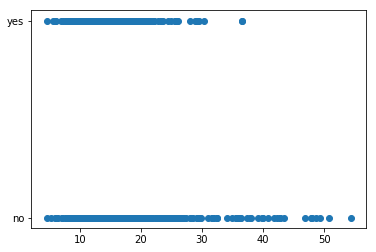

In [112]:
X1 = df['agePct12t21'].values
y1 = df['violent_crime_occurence'].values
plt.scatter(X1, y1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

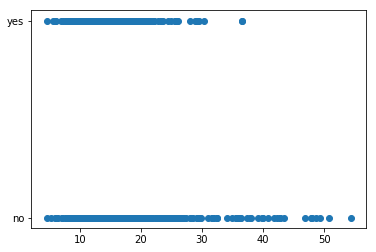

In [113]:
X2 = df['agePct12t21'].values
y2 = df['violent_crime_occurence'].values
plt.scatter(X2, y2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

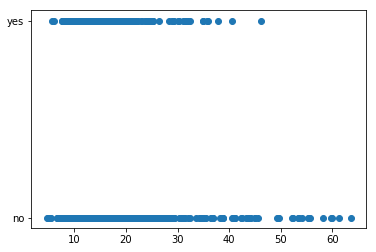

In [114]:
X3 = df['agePct16t24'].values
y3 = df['violent_crime_occurence'].values
plt.scatter(X3, y3)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

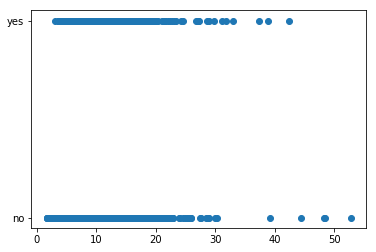

In [115]:
X4 = df['agePct65up'].values
y4 = df['violent_crime_occurence'].values
plt.scatter(X4, y4)
plt.show

## Vizualization Inference

It can be inferred that all the Age range features have similar kind of a relationship with the label and hence could be combined in order to reduce the dimensionality and hence speed up the learning process of a model.

## Feature Selection

In [71]:
features = ['agePct12t21','agePct12t29','agePct16t24', 'agePct65up']
X= df.loc[:, features].values
y = df.loc[:, ['violent_crime_occurence']].values

## Splitting Dataset into Test and Training Data

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Data preprocessing to standardize and scale data before applying PCA

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying PCA from sklearn for 2 Principal Components

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
explained_variance = pca.explained_variance_ratio_

## Final Dataframe with label concatenated with features

In [77]:
finalDf = pd.concat([principalDf, df[['violent_crime_occurence']]], axis = 1)

## Plot to observe the 2 Principal Components as a result of PCA

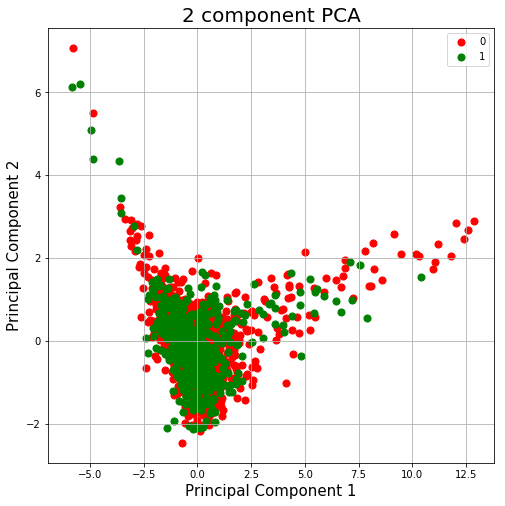

In [117]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['violent_crime_occurence'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Vafiance Ratio
The variance ratio values are 75.94% and 20.71% meaning that approximately 96% of the information can recontructed from the model and hence the Principal Components are as per model conventions.

In [82]:
print(explained_variance)

[0.75942017 0.20717271]
